## Prerequisites

- Metrics CSV
  - `metrics_baseline.csv`
  - `metrics_cascaded.csv`
- (easy-plotly)[https://github.com/mogproject/easy-plotly]


In [1]:
## Imports
import pandas as pd

In [2]:
df_unet = pd.read_csv('metrics_baseline.csv')
df_cascaded = pd.read_csv('metrics_cascaded.csv')

## Summary table

In [3]:
# output summary in LaTeX table format

df_unet_mean = df_unet.mean()
# df_unet_mean = df_unet.median()
# df_unet_mean = df_unet.quantile([0.25])
# df_unet_mean = df_unet.quantile([0.75])

unet_mean = [r'%.1f\%%' % (df_unet_mean[f'{label} {tp}'] * 100) for tp in ['dice', 'jaccard'] for label in ['BG', 'TC', 'ED', 'ET']]
# df_cascaded_mean = df_cascaded.mean()
df_cascaded_mean = df_cascaded.median() #quantile([0.75])
cascaded_mean = [r'%.1f\%%' % (df_cascaded_mean[f'{label} {tp}'] * 100) for tp in ['dice', 'jaccard'] for label in ['BG', 'TC', 'ED', 'ET']]

print(r'\begin{tabular}{c|c|c|c|c|c|c|c|c|c}')
print(r'&\multicolumn{4}{|c|}{Dice}')
print(r'&\multicolumn{4}{|c|}{Jaccard}\\')
print(r'& BG & TC & ED & ET & BG & TC & ED & ET \\')
print(r'\hline\hline')
print('UNet & ' + ' & '.join(unet_mean) + r' \\')
print('Cascaded & ' + ' & '.join(cascaded_mean) + r' \\')
print(r'\end{tabular}')

\begin{tabular}{c|c|c|c|c|c|c|c|c|c}
&\multicolumn{4}{|c|}{Dice}
&\multicolumn{4}{|c|}{Jaccard}\\
& BG & TC & ED & ET & BG & TC & ED & ET \\
\hline\hline
UNet & 99.9\% & 84.6\% & 82.2\% & 86.6\% & 99.8\% & 81.4\% & 76.6\% & 82.8\% \\
Cascaded & 99.9\% & 100.0\% & 93.1\% & 100.0\% & 99.9\% & 100.0\% & 87.1\% & 100.0\% \\
\end{tabular}


## Violin plots

In [4]:
try:
    import easy_plotly as ep
except ImportError:
    print('Install easy-plotly: https://github.com/mogproject/easy-plotly')

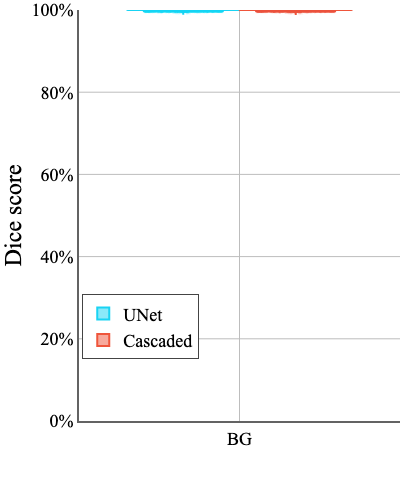

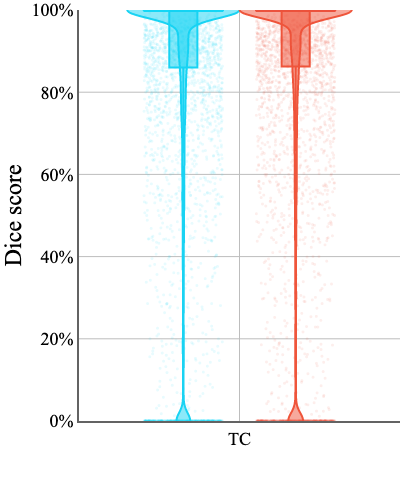

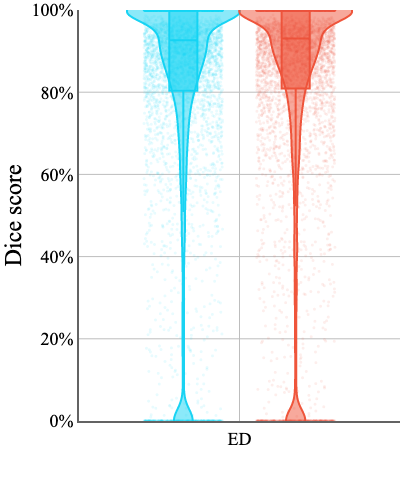

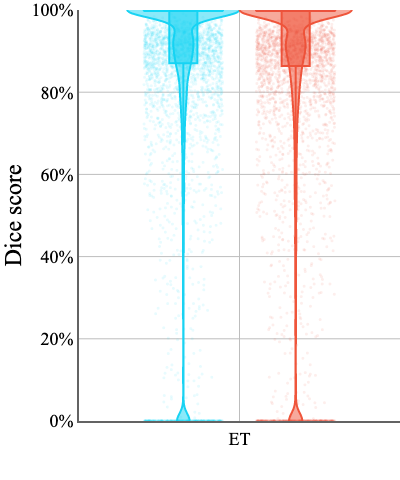

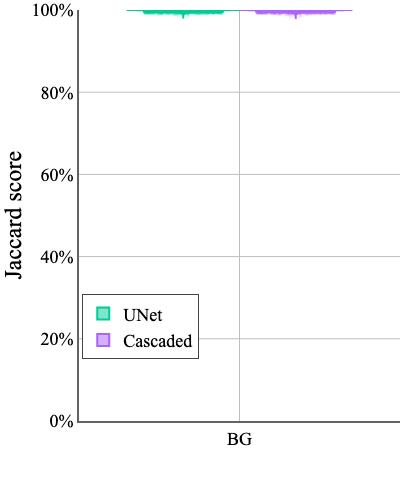

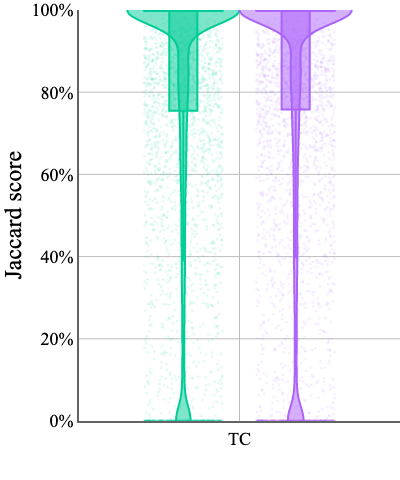

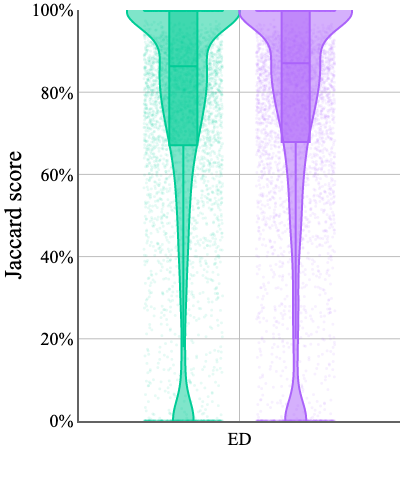

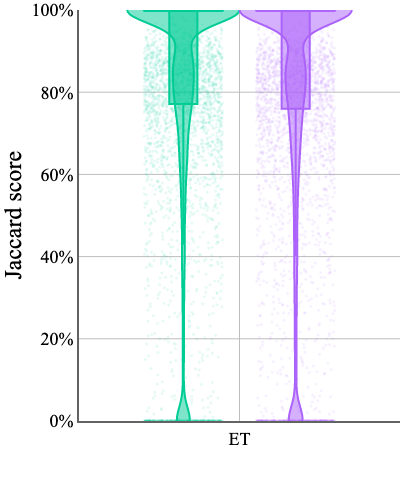

In [5]:
for tp in ['dice', 'jaccard']:
    for i, c in enumerate(['BG', 'TC', 'ED', 'ET']):
        fig = ep.PlotlyFigure('config/violin.yml', x_title='', y_title=tp.capitalize() + ' score')
        for p in range(2):
            mdl = ['UNet', 'Cascaded'][p]
            df = [df_unet, df_cascaded][p]

            label = c + ' ' + tp
            xs = [c] * len(df)
            ys = list(df[label])

            fig.add_violin(x=xs, y=ys, name=mdl, template=p if tp == 'dice' else 2 + p,
                marker_symbol='circle',
                marker_opacity=0.1, 
                marker_size=3,
                pointpos=0, # put scatters in middle of violin
                jitter=0.7,
                scalemode='width',
                points='all',
                # legendgroup=mdl,
                showlegend=(i==0)
            )
        fig.save(f'plots/plot_violin_{tp}_{i}.png', show=True)
    # fig.save(f'plot_violin_{tp}_{t}.png', show=True)
    # fig.show()